# Level 1 and 2 - Footprint level canopy height and profile metrics 

The waveforms are processed to provide canopy height and profile metrics. These are values calculated directly from the waveform return for each footprint such as terrain elevation, canopy height, RH metrics and Leaf Area Index (LAI). These metrics provide easy-to-use and interpret information about the vertical distribution of the canopy material. https://gedi.umd.edu/data/products/

In [1]:
from pyGEDI import *

Select the file of Product GEDI 1B and 2A 2B with the date of interest.

In [2]:
fileh5_2A='data/GEDI02_A_2019108080338_O01964_T05337_02_001_01_sub.h5'
fileh5_1B='data/GEDI01_B_2019108080338_O01964_T05337_02_003_01_sub.h5'

Read the following H5 files with function getH5.

In [3]:
h5_1B=getH5(fileh5_1B)
h5_2A=getH5(fileh5_2A)

# Plot the full-waveform 
Please note you will need the following packages:

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

The GEDI Level 1B Geolocated Waveforms product (GEDI01_B) provides geolocated corrected and smoothed waveforms, geolocation parameters, and geophysical corrections for each laser shot for all eight GEDI beams. GEDI01_B data are created by geolocating the GEDI01_A raw waveform data. https://lpdaac.usgs.gov/products/gedi01_bv001/

Visualize and extract full-waveform with the giving shotnumber of GEDI01_B data.

In [5]:
shot_number=19640521100108408
rxwaveform,elevation = waveForm(shot_number,h5_1B)

Text(0, 0.5, 'Elevation (m)')

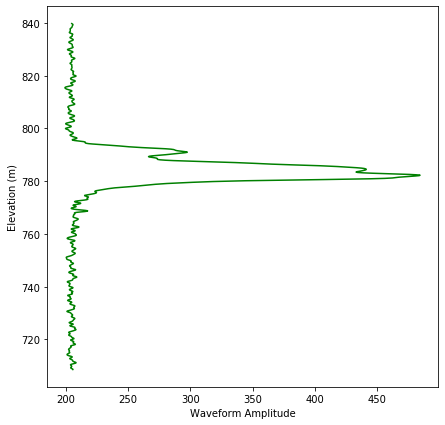

In [6]:
fig = plt.subplots(figsize=(7,7))
plt.plot(rxwaveform,elevation, 'green')
plt.xlabel("Waveform Amplitude")
plt.ylabel("Elevation (m)")

The GEDI Level 2A Geolocated Elevation and Height Metrics product (GEDI02_A) is to provide waveform interpretation and extracted products from each GEDI01_B received waveform, including ground elevation, canopy top height, and relative height (RH) metrics. The methodology for generating the GEDI02_A product datasets is adapted from the Land, Vegetation, and Ice Sensor (LVIS) algorithm.https://lpdaac.usgs.gov/products/gedi02_av001/

Plot the waveform with GEDI Level 2A rh metrics. To visualize the graph, load both products GEDI Level 2A and 2B. These are values calculated directly from the waveform return for each footprint such as, terrain elevation, canopy, height, TH metrics and Leaf Area Index (LAI).

the next example uses GEDIE Level 2A and 1B:
getBeam is a function that extracts **BEAM** which is associated with **shot_number**, 

In [7]:
beam=getBeam(shot_number,h5_2A)
shot_number_id=list(h5_2A[beam]['shot_number'][:]).index(shot_number)
rh_z=h5_2A[beam]['rh'][shot_number_id]+h5_2A[beam]['elev_lowestmode'][shot_number_id]
heights=h5_2A[beam]['rh'][shot_number_id]+abs(min(h5_2A[beam]['rh'][shot_number_id]))

The next figure is the vertical visualization of tree height that corresponds to one shot_number where waveform can be observed associated with different percentiles: 0, 25, 75, 100

In [8]:
target_rh=[0,25,50,75,100]

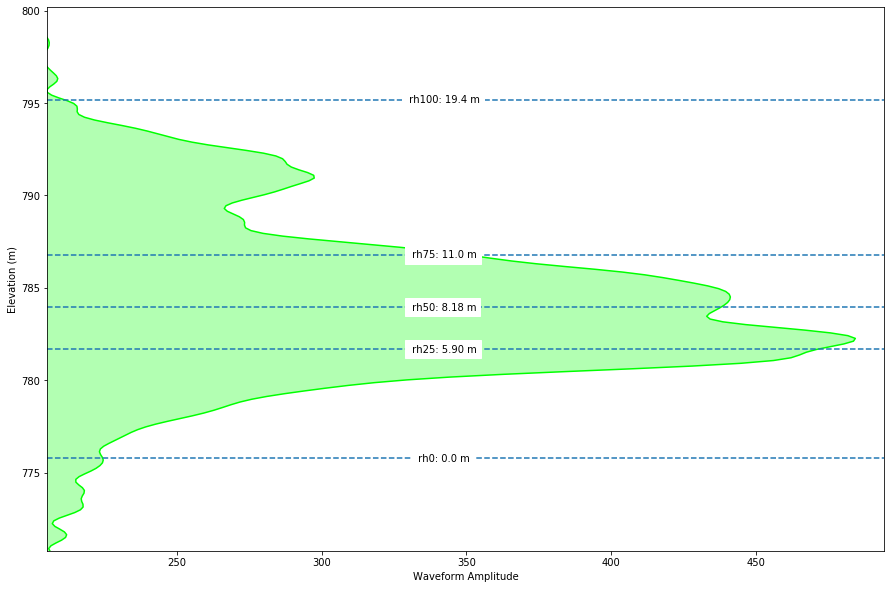

In [9]:
fig = plt.subplots(figsize=(15,10))

plt.plot(rxwaveform,elevation,color='lime')
plt.fill_between(rxwaveform,elevation, facecolor='lime',alpha=.3)

plt.ylim(min(rh_z)-5, max(rh_z)+5)
plt.xlim(min(rxwaveform)+6, max(rxwaveform)+10)

center=(abs(max(rxwaveform)) + abs(min(rxwaveform)))*0.5

for rh_i in target_rh:
    txt=(' rh' + str(rh_i))
    plt.axhline(y=rh_z[rh_i],linestyle='--')
    plt.text(center, rh_z[rh_i],
             txt +': '+str(heights[rh_i ])[:4]+ ' m',
             ha='center',
             va='center',
             backgroundcolor='w')

plt.xlabel("Waveform Amplitude")
plt.ylabel("Elevation (m)")

plt.show()